# READING THE DATASET

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow.keras as k
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import time

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522602,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,0
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,1
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,1
3,881.757864,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,0
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,0


In [4]:
label = ['condition']
features = ['MEAN_RR','RMSSD','pNN25','pNN50','LF','HF','LF_HF']

In [5]:
scaler = StandardScaler()
scaler.fit(df[features])
df[features] = scaler.transform(df[features])

In [6]:
X = df[features].values
y = df[label].values

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 40)

In [8]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(258502, 7) (258502, 1) (110787, 7) (110787, 1)


In [9]:
y_train = k.utils.to_categorical(y_train)
y_test = k.utils.to_categorical(y_test)

# CREATING A MODEL

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [11]:
model = Sequential()
model.add(Dense(50, activation='relu',kernel_initializer = 'he_normal',input_shape=(X_train.shape[1],)))
model.add(Dense(20, activation='relu',kernel_initializer = 'he_normal'))
model.add(Dense(10, activation='relu',kernel_initializer = 'he_normal'))
model.add(Dense(3, activation='softmax'))

C:\Users\Krishna Gupta\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(X_train,y_train, validation_data = (X_test,y_test), epochs = 50, batch_size = 1024, verbose =1)

Epoch 1/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5836 - loss: 0.9373 - val_accuracy: 0.7002 - val_loss: 0.7002
Epoch 2/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7129 - loss: 0.6583 - val_accuracy: 0.7535 - val_loss: 0.5680
Epoch 3/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7732 - loss: 0.5343 - val_accuracy: 0.8120 - val_loss: 0.4706
Epoch 4/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8226 - loss: 0.4445 - val_accuracy: 0.8406 - val_loss: 0.4029
Epoch 5/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8478 - loss: 0.3877 - val_accuracy: 0.8642 - val_loss: 0.3549
Epoch 6/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8709 - loss: 0.3428 - val_accuracy: 0.8758 - val_loss: 0.3250
Epoch 7/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8848 - loss: 0.3093 - val_accuracy: 0.8931 - val_loss: 0.2958
Epoch 8/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8982 - loss: 0.2850 - val_accuracy: 0.

<Axes: >

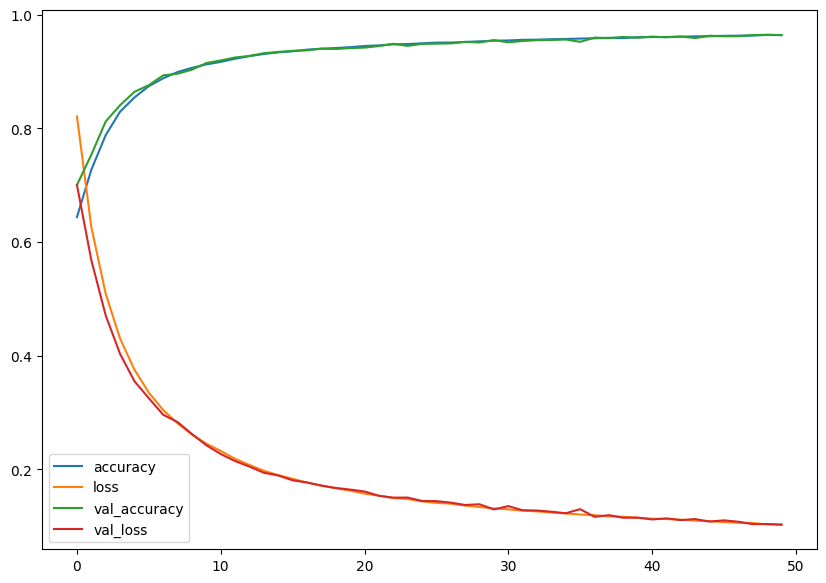

In [14]:
pd.DataFrame(history.history).plot(figsize=(10,7))

# TESTING ON TEST SET

In [15]:
df_test = pd.read_csv('test.csv')

In [16]:
df_test[features] = scaler.transform(df_test[features])
df_test[features].head()

,MEAN_RR,RMSSD,pNN25,pNN50,LF,HF,LF_HF
0,-1.001159,-0.634891,-0.598837,-0.874583,-0.575814,0.602911,-0.295775
1,-0.024971,1.048686,1.361573,-0.672601,1.080403,-0.280746,-0.157544
2,0.897836,1.544671,1.743894,0.943254,1.965161,-0.511482,0.037412
3,-0.175046,-0.777935,-0.623241,-0.335965,-0.767443,-0.477196,-0.241658
4,-0.721825,-0.393071,-0.476820,-0.201310,-0.735541,-0.089133,-0.280126


In [17]:
X = df_test[features].values
y = df_test[label].values

In [18]:
y = k.utils.to_categorical(y)

In [19]:
loss,acc = model.evaluate(X,y,verbose=1)

1283/1283 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9647 - loss: 0.1026


# FINAL PIPLINE FOR PREDICTION 

In [20]:
data = pd.read_csv('test.csv')

In [21]:
t = scaler.transform(data[features].iloc[5545].values.reshape(1,-1))
print(t)

[[-0.7699341   0.25391942  0.11699709  0.60661783  0.54497884  0.50787441
  -0.26537627]]


C:\Users\Krishna Gupta\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:
y_pred = model.predict(t)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


In [23]:
print(np.argmax(y_pred[0]))
print(data[label].iloc[5544])

0
condition    1
Name: 5544, dtype: int64
